<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2024/blob/main/volumen_y_porcentaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-8a23c39e5d98>:12: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  with cbook.get_sample_data('goog.npz') as file: # Open the file returned by get_sample_data


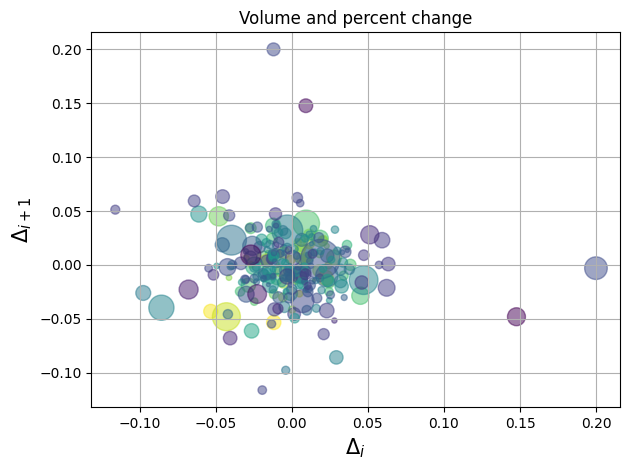

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
# %pip install --upgrade matplotlib # This is not required as the module is already imported.

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
with cbook.get_sample_data('goog.npz') as file: # Open the file returned by get_sample_data
    price_data = np.load(file)['price_data'] # Load data from the opened file object

price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data["adj_close"]) / price_data["adj_close"][:-1]

# Marker size in units of points^2
volume = (15 * price_data["volume"][:-2] / price_data["volume"][0])**2
close = 0.003 * price_data["close"][:-2] / 0.003 * price_data["open"][:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15) # Fixed syntax error by adding closing $
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15) # Fixed syntax error by adding closing $
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()
